In [26]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet') # Download for lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_refined(text):
    # Apply existing cleaning steps
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

df['Tweet'] = df['Tweet'].apply(clean_text_refined)

# Display the cleaned data
print(df.head())

        Entity Sentiment                         Tweet
0  Borderlands  Positive  im getting borderland murder
1  Borderlands  Positive            coming border kill
2  Borderlands  Positive    im getting borderland kill
3  Borderlands  Positive   im coming borderland murder
4  Borderlands  Positive  im getting borderland murder


In [29]:
import nltk
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_refined(text):
    # Apply existing cleaning steps
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

df['Tweet'] = df['Tweet'].apply(clean_text_refined)

# Display the cleaned data
print(df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


        Entity Sentiment                         Tweet
0  Borderlands  Positive  im getting borderland murder
1  Borderlands  Positive            coming border kill
2  Borderlands  Positive    im getting borderland kill
3  Borderlands  Positive   im coming borderland murder
4  Borderlands  Positive  im getting borderland murder


In [30]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X_new = vectorizer_ngram.fit_transform(df['Tweet'])
y = df['Sentiment']

print("Shape of the new feature matrix:", X_new.shape)

Shape of the new feature matrix: (73996, 10000)


Best parameters: {'C': 10, 'solver': 'saga'}
Best cross-validation accuracy: 0.6992216921918153

Accuracy: 0.7060989489187922

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.67      0.59      0.63      2592
    Negative       0.76      0.77      0.76      4519
     Neutral       0.65      0.67      0.66      3596
    Positive       0.72      0.73      0.73      4230

    accuracy                           0.71     14937
   macro avg       0.70      0.69      0.70     14937
weighted avg       0.71      0.71      0.71     14937



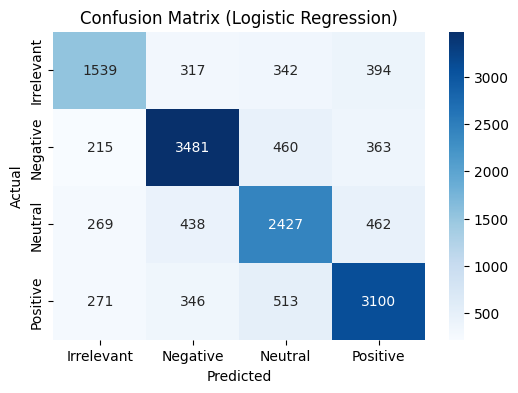

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Instantiate a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix for the best model
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()